

*Par [Abdoulaye Balde](https://www.linkedin.com/in/abdoulayegk/)*

* Préparation des données pour le Machine Learning
* Gérer les valeurs manquantes
* Convertir des données catégorielles en numériques avec (dummies variable, * label encoder, one hot encoding)
* Différencier les variable catégorielle nominale et ordinal
* Standardisation des données
* Exploration des données et visualisation avec matplotlib, seaborn et plotly




**Le web scraping** est une technique permettant d'extraire des données d'un site web. En utilisant Python et la bibliothèque Pandas, on peut automatiser ce processus. En quelques lignes, on peut importer les modules nécessaires, charger la page web, extraire les données avec des sélecteurs HTML ou CSS, et les stocker dans une structure de données Pandas pour l'analyse ultérieure.

### ***Importation des données***

On va utiliser un ensemble de données disponible dans la librairie Seaborn. Il s'agit des données sur les survivants du naufrage du Titanic :

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_html("https://fr.wikipedia.org/wiki/Classement_mondial_des_universit%C3%A9s_QS")
df

[                  0                        1
 0  Date de création                     2004
 1   Sujet principal  Palmarès universitaires,
           0                             1
 0    Langue                       Anglais
 1  Site web  (en) www.topuniversities.com,
     2019/20[3] 2016/17[4] 2015/16[5] 2014/15[6] 2013/14[7] 2012/13[8]  \
 0            1          1          1          1          1          1   
 1            7          4          3          2          3          2   
 2            3          3          2          4          2          3   
 3            8          7          7          5          4          4   
 4            4          6          6          5          6          5   
 5            9          9          8          2          5          6   
 6           17         15         15         10          8          7   
 7           10         10         10         11          9          8   
 8           13         11         11          9         10      

Quand on lu du **html** avec Pandas il nous retourne une liste donc on peut utiliser les index pour acceder aux elements.

In [ ]:
type(df)

list

Note **Pandas** a lu les tableaux comme des liste donc on peut facilement acceder au element a travers l'index.

In [ ]:

df[1]

,0,1
0,Langue,Anglais
1,Site web,(en) www.topuniversities.com


In [ ]:
df[5]

,Nom,Ville,"Rang national ARWU, 2021,","Rang international ARWU, 2021","Rang national THE, 2022","Rang international THE, 2022","Rang national QS, 2021","Rang international QS, 2021",Nombre d'étudiants,Remarques
0,Université Paris-Saclay,Orsay,1,13,4,117,4,86,48 000,"Regroupe CentraleSupélec, l'ENS Paris-Saclay, ..."
1,Sorbonne Université,Paris,2,35,2,88,3,72,55 600,Fusion de l'université Paris-Sorbonne (Paris-I...
2,Université PSL,Paris,3,38,1,40,1,44,17 000,"Regroupe l'Université Paris-Dauphine, l'ENS Ul..."
3,Université Paris-Cité,Paris,4,73,5,155,7,261,64 100,Fusion des universités Paris Descartes (Paris-...
4,Aix-Marseille Université,Marseille,5,101-150,7,301-350,s.o.,s.o.,80 000,"Fusion des universités Aix-Marseille I, II et ..."
5,Université Grenoble-Alpes,Grenoble,6,101-150,11,301-350,10,314,55 000,NaN
6,Université de Strasbourg,Strasbourg,7,101-150,18,501-600,s.o.,s.o.,48 011,NaN
7,Université de Montpellier,Montpellier,8,151-200,7,301-350,s.o.,s.o.,49 000,NaN
8,Université de Bordeaux,Bordeaux,9,201-300,7,301-350,s.o.,s.o.,50 174,NaN
9,Université Claude Bernard Lyon 1,Lyon,10,201-300,13,401-500,s.o.,s.o.,46 000,NaN


On peut maintenant enregister le fichier en format **csv** et le lire apres pour faire l'analyse.

In [ ]:
df[5].to_csv("universites.csv", index=False)

## Exo:

Charger le fichier Universites.csv et trouver le nombre d'universite pour chaque pays.

In [ ]:
df = pd.read_csv("universites.csv")
df.head()

,Nom,Ville,"Rang national ARWU, 2021,","Rang international ARWU, 2021","Rang national THE, 2022","Rang international THE, 2022","Rang national QS, 2021","Rang international QS, 2021",Nombre d'étudiants,Remarques
0,Université Paris-Saclay,Orsay,1,13,4,117,4,86,48 000,"Regroupe CentraleSupélec, l'ENS Paris-Saclay, ..."
1,Sorbonne Université,Paris,2,35,2,88,3,72,55 600,Fusion de l'université Paris-Sorbonne (Paris-I...
2,Université PSL,Paris,3,38,1,40,1,44,17 000,"Regroupe l'Université Paris-Dauphine, l'ENS Ul..."
3,Université Paris-Cité,Paris,4,73,5,155,7,261,64 100,Fusion des universités Paris Descartes (Paris-...
4,Aix-Marseille Université,Marseille,5,101-150,7,301-350,s.o.,s.o.,80 000,"Fusion des universités Aix-Marseille I, II et ..."


# Change le nom de la premiere colonne Nom par universite?

In [ ]:
df.rename(columns={'Nom':'Universite'}, inplace=True)

In [ ]:
df.head()

,Universite,Ville,"Rang national ARWU, 2021,","Rang international ARWU, 2021","Rang national THE, 2022","Rang international THE, 2022","Rang national QS, 2021","Rang international QS, 2021",Nombre d'étudiants,Remarques
0,Université Paris-Saclay,Orsay,1,13,4,117,4,86,48 000,"Regroupe CentraleSupélec, l'ENS Paris-Saclay, ..."
1,Sorbonne Université,Paris,2,35,2,88,3,72,55 600,Fusion de l'université Paris-Sorbonne (Paris-I...
2,Université PSL,Paris,3,38,1,40,1,44,17 000,"Regroupe l'Université Paris-Dauphine, l'ENS Ul..."
3,Université Paris-Cité,Paris,4,73,5,155,7,261,64 100,Fusion des universités Paris Descartes (Paris-...
4,Aix-Marseille Université,Marseille,5,101-150,7,301-350,s.o.,s.o.,80 000,"Fusion des universités Aix-Marseille I, II et ..."


In [ ]:
df['Ville'].value_counts()

Paris               5
Toulouse            2
Orsay               1
Versailles          1
Nantes              1
Rennes              1
Clermont-Ferrand    1
Dijon               1
Lille               1
Nice                1
Palaiseau           1
Metz Nancy          1
Lyon                1
Bordeaux            1
Montpellier         1
Strasbourg          1
Grenoble            1
Marseille           1
Cergy-Pontoise      1
Name: Ville, dtype: int64

In [ ]:
import seaborn as sns

<Axes: xlabel='Ville', ylabel='count'>

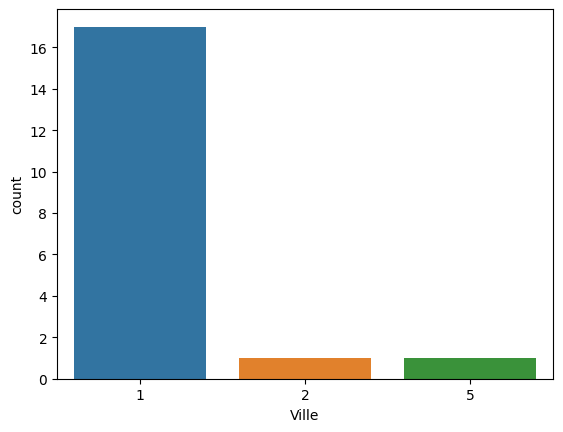

In [ ]:
sns.countplot(x = df['Ville'].value_counts())

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df['Ville'].unique()

array(['Orsay', 'Paris', 'Marseille', 'Grenoble', 'Strasbourg',
       'Montpellier', 'Bordeaux', 'Lyon', 'Metz Nancy', 'Palaiseau',
       'Toulouse', 'Nice', 'Lille', 'Dijon', 'Clermont-Ferrand', 'Rennes',
       'Nantes', 'Versailles', 'Cergy-Pontoise'], dtype=object)

[Text(0, 0, 'Orsay'),
 Text(1, 0, 'Paris'),
 Text(2, 0, 'Marseille'),
 Text(3, 0, 'Grenoble'),
 Text(4, 0, 'Strasbourg'),
 Text(5, 0, 'Montpellier'),
 Text(6, 0, 'Bordeaux'),
 Text(7, 0, 'Lyon'),
 Text(8, 0, 'Metz Nancy'),
 Text(9, 0, 'Palaiseau'),
 Text(10, 0, 'Toulouse'),
 Text(11, 0, 'Nice'),
 Text(12, 0, 'Lille'),
 Text(13, 0, 'Dijon'),
 Text(14, 0, 'Clermont-Ferrand'),
 Text(15, 0, 'Rennes'),
 Text(16, 0, 'Nantes'),
 Text(17, 0, 'Versailles'),
 Text(18, 0, 'Cergy-Pontoise')]

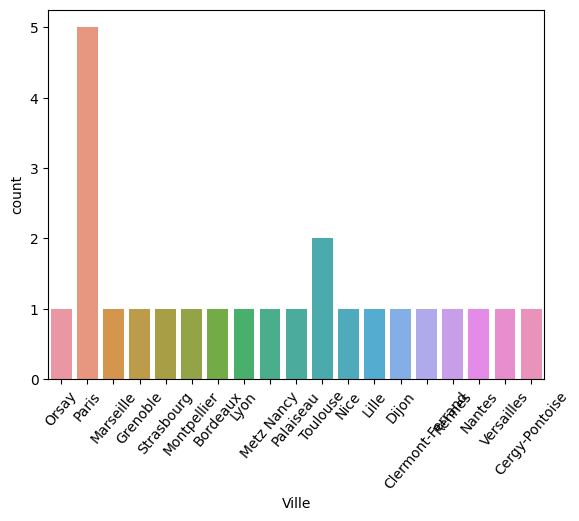

In [ ]:
sns.countplot(x = df['Ville'])
labels = ['Orsay', 'Paris', 'Marseille', 'Grenoble', 'Strasbourg',
       'Montpellier', 'Bordeaux', 'Lyon', 'Metz Nancy', 'Palaiseau',
       'Toulouse', 'Nice', 'Lille', 'Dijon', 'Clermont-Ferrand', 'Rennes',
       'Nantes', 'Versailles', 'Cergy-Pontoise']
ax = plt.gca()
ax.set_xticklabels(labels = labels, rotation=50)

[Text(0, 0, 'Orsay'),
 Text(1, 0, 'Paris'),
 Text(2, 0, 'Marseille'),
 Text(3, 0, 'Grenoble'),
 Text(4, 0, 'Strasbourg'),
 Text(5, 0, 'Montpellier'),
 Text(6, 0, 'Bordeaux'),
 Text(7, 0, 'Lyon'),
 Text(8, 0, 'Metz Nancy'),
 Text(9, 0, 'Palaiseau'),
 Text(10, 0, 'Toulouse'),
 Text(11, 0, 'Nice'),
 Text(12, 0, 'Lille'),
 Text(13, 0, 'Dijon'),
 Text(14, 0, 'Clermont-Ferrand'),
 Text(15, 0, 'Rennes'),
 Text(16, 0, 'Nantes'),
 Text(17, 0, 'Versailles'),
 Text(18, 0, 'Cergy-Pontoise')]

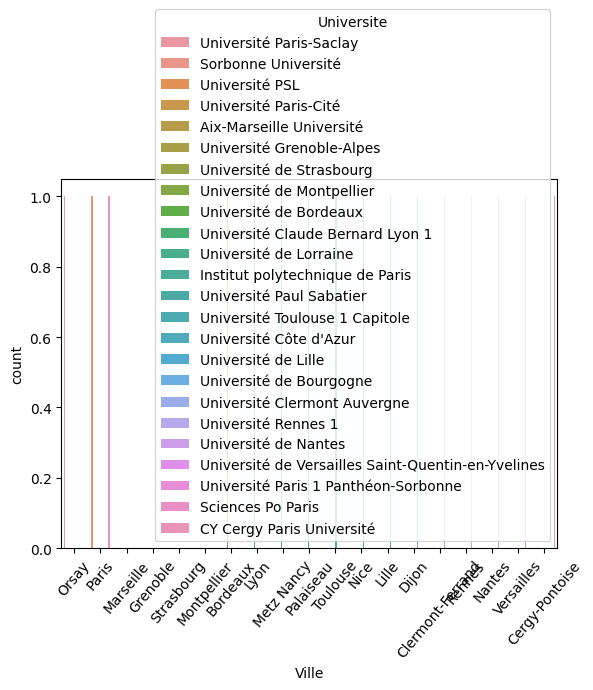

In [ ]:
sns.countplot(x = df['Ville'], hue='Universite', data=df)
labels = ['Orsay', 'Paris', 'Marseille', 'Grenoble', 'Strasbourg',
       'Montpellier', 'Bordeaux', 'Lyon', 'Metz Nancy', 'Palaiseau',
       'Toulouse', 'Nice', 'Lille', 'Dijon', 'Clermont-Ferrand', 'Rennes',
       'Nantes', 'Versailles', 'Cergy-Pontoise']
ax = plt.gca()
ax.set_xticklabels(labels = labels, rotation=50)

In [ ]:
# Importation de la librairie seaborn
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# Chagement des données du titanic à partir de la librairie 'seaborn'
titanic = sns.load_dataset('titanic')

La première chose à faire est de jeter un rapide coup d'oeil à notre dataframe en affichant ses premières lignes.

In [ ]:
titanic.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
# Méthode head(n). Par défaut n = 5
titanic.head()

In [ ]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


La méthode ***.tail()*** affiche les derniers éléments de la DataFrame (Par défaut, ce sont les 5 dernières lignes qui sont affichées).

In [ ]:
# Méthode .tail(n)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# Trouver les personnes avec sex male et qui sont dans class 3

In [ ]:
titanic[(titanic['sex'] == 'male') & (titanic['class'] == 'Third') ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


Trouvez le nombre total des personnes avec sex male et qui sont dans la 3eme class.

In [ ]:
len(titanic[(titanic['sex'] == 'male') & (titanic['class'] == 'Third') ])

347

# Q1 Trouvez le nombre des male qui sont en vie(alive)?

In [ ]:
filtered_df = titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1) & (titanic['Pclass'] == 1)]
filtered_df

# Trouvez le numbre de femme dans la premiere class( First class)?

On peut aussi regarder un mélange de n lignes d'un tableau de données :

## Code pour extraire les noms des colonnes avec des données de type numérique et des données de chaîne (objet) et les stocker dans différentes listes

In [ ]:
string_columns = titanic.select_dtypes(include='object').columns
print("String Columns are = ",string_columns)
print()
numerical_columns = titanic.select_dtypes(include=['int64','float64']).columns
print("Numerical Columns are = ",numerical_columns)

String Columns are =  Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')

Numerical Columns are =  Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


On peut aussi utilise exclude pour exclure de donnee

In [ ]:
string_columns = titanic.select_dtypes(include='object').columns
print("String Columns are = ",string_columns)
print()
numerical_columns = titanic.select_dtypes(exclude='O').columns
print("Numerical Columns are = ",numerical_columns)

String Columns are =  Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')

Numerical Columns are =  Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class',
       'adult_male', 'deck', 'alone'],
      dtype='object')


# passager survivant selon pclass

<Axes: xlabel='survived', ylabel='count'>

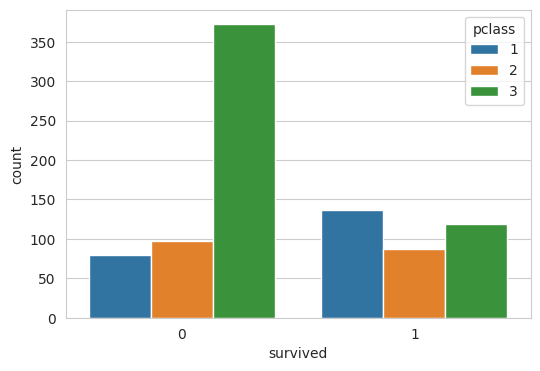

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass' , data=titanic)

# Pour représenter les décomptes de valeurs (value counts) de toutes les colonnes catégorielles

In [ ]:
# Identifiez les colonnes catégorielles dans le jeu de données
categorical_columns = titanic.select_dtypes(include=['object']).columns

categorical_columns

Index(['sex', 'embarked', 'who', 'embark_town', 'alive'], dtype='object')

In [ ]:
# Parcourez chaque colonne catégorielle et créez un diagramme en barres à l'aide de Plotly

for column in categorical_columns:
    value_counts = titanic[column].value_counts()
    fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values, title=f'Décompte des valeurs de {column}')
    fig.show()


# Pour créer des histogrammes et des boxplots pour toutes les variables numériques dans le dataset Titanic en utilisant Plotly

In [ ]:
# Identifiez les colonnes numériques dans le jeu de données

numeric_columns = titanic.select_dtypes(exclude='O').columns
numeric_columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'class',
       'adult_male', 'deck', 'alone'],
      dtype='object')

In [ ]:
# Parcourez chaque colonne numérique et créez un histogramme et un boxplot à l'aide de Plotly

for column in numeric_columns:
    fig = px.histogram(titanic, x=column, title=f'Histogramme de {column}')
    fig.show()

    fig = px.box(titanic, y=column, title=f'Boxplot de {column}')
    fig.show()


# Avec Seaborn on peut voir de facon visuel les colonne qui sont vide en utilisant heatmap.

<Axes: >

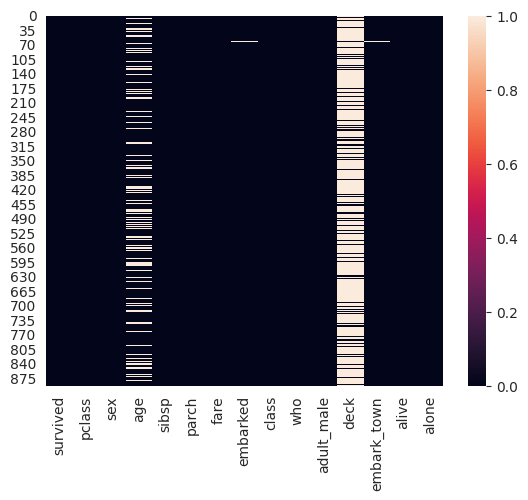

In [ ]:
sns.heatmap(titanic.isna())

In [ ]:
# Echantillon aléatoire de la dataframe
titanic.sample(5)

Jetons un coup d'oeil aux lieux d'embarquation dans le bateau. La fonction ***unique()*** renvoie les valeurs uniques présentes dans une structure de données Pandas.

In [ ]:
# Modalités distinctes d'une variable
titanic['embark_town'].unique()

Mentionnons aussi l'excellente fonction  ***describe()*** . Elle donne des statistiques diverses (moyenne, maximum, minimum, etc.) sur les données contenues dans chaque colonne:

In [ ]:
# Statistiques sur les variables numériques
titanic.describe()

Par défaut, cette fonction génère des statistiques descriptives des variables quantitatives. L' argument *include="all"* sert à inclure les colonnes non-numérique dans l'analyse. Cette fonction nous fournit pleins de données très utiles sur la répartition de nos données (minimum, maximum, moyenne, etc.)

In [ ]:
# Statistiques sur toutes les variables
titanic.describe(include = 'all')

### ***Traitement des valeurs manquantes***

NaN est une valeur définie pour représenter quelque chose qui n'est pas un nombre (Not a Number) alors que son type l'exige. Par exemple, on obtient NaN si on demande à Pandas de calculer la moyenne d'une colonne de texte.

On va voir deux opérations à appliquer aux NaN.

La première consiste à remplacer les NaN par d'autres valeurs. Cette opération s'effectue grâce à la fonction  fillna  .

Mais avant, voyons comment déterminer le nombre de valeurs manquantes par colonne :

In [ ]:
# détermination des colonnes avec valeurs manquantes
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# Remplacement des valeurs manquantes dans la colonne "age"
titanic_age = titanic.fillna(value = {'age':0})

In [ ]:
titanic_age.isna().sum()

# Remplacement de valeur manquante

In [ ]:
import numpy as np

In [ ]:
df = pd.DataFrame({
    'age': [np.nan, 20, np.nan, 5, 20, 14],
    'height': [5, 7, np.nan, 4.1, 5.4, 5.4],
    'pet': ['dog', np.nan, 'cat', 'dog', 'cat', np.nan]
})
df

,age,height,pet
0,NaN,5.0,dog
1,20.0,7.0,NaN
2,NaN,NaN,cat
3,5.0,4.1,dog
4,20.0,5.4,cat
5,14.0,5.4,NaN


Pour remplacer les valeurs manquantes on peut utiliser plusieurs methods:
1. ffill
2. bfill
3. fillna

In [ ]:
# Avec la methode ffill

dff = df.ffill()
dff

,age,height,pet
0,NaN,5.0,dog
1,20.0,7.0,dog
2,20.0,7.0,cat
3,5.0,4.1,dog
4,20.0,5.4,cat
5,14.0,5.4,cat


In [ ]:
df.fillna(df.mean())

<ipython-input-54-a2478f315f9e>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,height,pet
0,14.75,5.00,dog
1,20.00,7.00,NaN
2,14.75,5.38,cat
3,5.00,4.10,dog
4,20.00,5.40,cat
5,14.00,5.40,NaN


In [ ]:
# en utilisant fillna
dfff = df.fillna(value={'age':df['age'].median()})
dfff

,age,height,pet
0,17.0,5.0,dog
1,20.0,7.0,NaN
2,17.0,NaN,cat
3,5.0,4.1,dog
4,20.0,5.4,cat
5,14.0,5.4,NaN


In [ ]:
df.mean()

<ipython-input-53-c61f0c8f89b5>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



age       14.75
height     5.38
dtype: float64

In [ ]:
df = pd.DataFrame({
    'age': [np.nan, 20, np.nan, 5, 20, 14],
    'height': [5, 7, np.nan, 4.1, 5.4, 5.4],
    'pet': ['dog', np.nan, 'cat', 'dog', 'cat', np.nan]
})
df

,age,height,pet
0,NaN,5.0,dog
1,20.0,7.0,NaN
2,NaN,NaN,cat
3,5.0,4.1,dog
4,20.0,5.4,cat
5,14.0,5.4,NaN


In [ ]:
df['pet'].fillna(df.pet.mode()[0])

0    dog
1    cat
2    cat
3    dog
4    cat
5    cat
Name: pet, dtype: object

# Note
Il est fortement déconseillé d'utiliser les méthodes **bfill et ffill** car si la sortie ou la première entrée est vide, elles ne pourront pas remplacer les colonnes vides qui suivent.

In [1]:
# Remplacement par la moyenne
titanic_age2 = titanic.fillna(value = {'age':titanic['age'].median()})

NameError: ignored

In [ ]:
titanic_age2.isna().sum()

Enfin, la fonction  dropna  permet de supprimer les axes (colonnes ou lignes) qui contiennent des NaN. Par défaut, elle supprime les lignes concernées:

In [ ]:
# Suppression de toutes les lignes présentant des valeurs manquantes
titanic_sans_na = titanic.dropna()

In [ ]:
titanic_sans_na.isna().sum()

In [ ]:
# On est passé à combien de lignes ?
titanic_sans_na.shape

In [ ]:
titanic.shape

Mais on peut aussi lui demander de supprimer les colonnes présentant de valeurs manquantes. Si on connait le nom de ces colonnes, on peut écrire :

In [ ]:
titanic.isna().sum()

In [ ]:
# Suppression des colonnes présentant des valeurs manquantes
titanic_colonne_sans_na = titanic.drop(
    ['age', 'embarked', 'deck', 'embark_town'],
    axis = 1)

In [ ]:
# Vérification
titanic_colonne_sans_na.columns

Si on ne connait le nom des colonnes présentant des valeurs manquantes, on peut écrire :

In [ ]:
# Suppression
titanic_colonne_sans_na2 = titanic.dropna(axis = 1)

In [ ]:
# vérification
titanic_colonne_sans_na2.columns

In [ ]:
titanic_colonne_sans_na2.isna().sum()

## Renommer une colonne

La fonction rename permet de renommer les colonnes ou les lignes d'un DataFrame.

In [ ]:
# Renommer la colonne 'sex' en 'sexe'
titanic.rename(columns={'sex':'sexe'}, inplace=True)

In [ ]:
titanic.head()

## Supprimer des axes

La fonction  drop  permet de supprimer des axes (colonnes ou lignes) d'un DataFrame. Son utilisation est plutôt simple.

In [ ]:
# Pour supprimer la ligne dont l'index est égal à 0.
titanic.drop(0).head()

In [ ]:
# Pour supprime la colonne "age"
titanic.drop(['age', 'parch'], axis = 1).head()

## Aggrégation

In [ ]:
# Exemple d'aggrégation
titanic.groupby(['pclass', 'sexe'])['age'].agg(['mean', 'median'])

Pandas est l'une des librairies fondamentales en Data Science. C'est un puissant outil allant des fonctionnalités les plus simples aux plus complexes.

In [ ]:
titanic.isna().sum()

In [ ]:
titanic['deck'].value_counts(dropna=False)

D'en haut, nous pouvons voir que nous avons inclus le nombre de nan sur le nombre de valeurs en passant l'argument dropna=false.
Et nous pouvons y voir la plupart des données avec nan sont manquantes, nous devons donc être prudents avec ce genre de situation.
la meilleure façon de résoudre ce problème est de le remplacer par quelque chose comme Aucun ou autres ou nous le remplaçons par mode.

# Nexte Voir Note Day3 demo2.